In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df = pd.read_csv('survey lung cancer.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
print(df.isnull().sum() , '\n')

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64 



In [ ]:
data = df
#for gender
data['GENDER']= data['GENDER'].map({'M': 1, 'F':0})
# yes = 2 and No = 1 
map = {2: 1, 1: 0}
features= {'SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC DISEASE','FATIGUE ','ALLERGY ','WHEEZING','ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY' , 'CHEST PAIN'}
for feature in features:
  data[feature] = data[feature].map(map)
data['LUNG_CANCER'] = data['LUNG_CANCER'].map({'YES': 1, 'NO': 0})
data['AGE'] , quarantile = pd.qcut(data['AGE'], 2, labels = False, retbins = True, duplicates = "drop")
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,1,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,1,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0


***Feature Extractions***

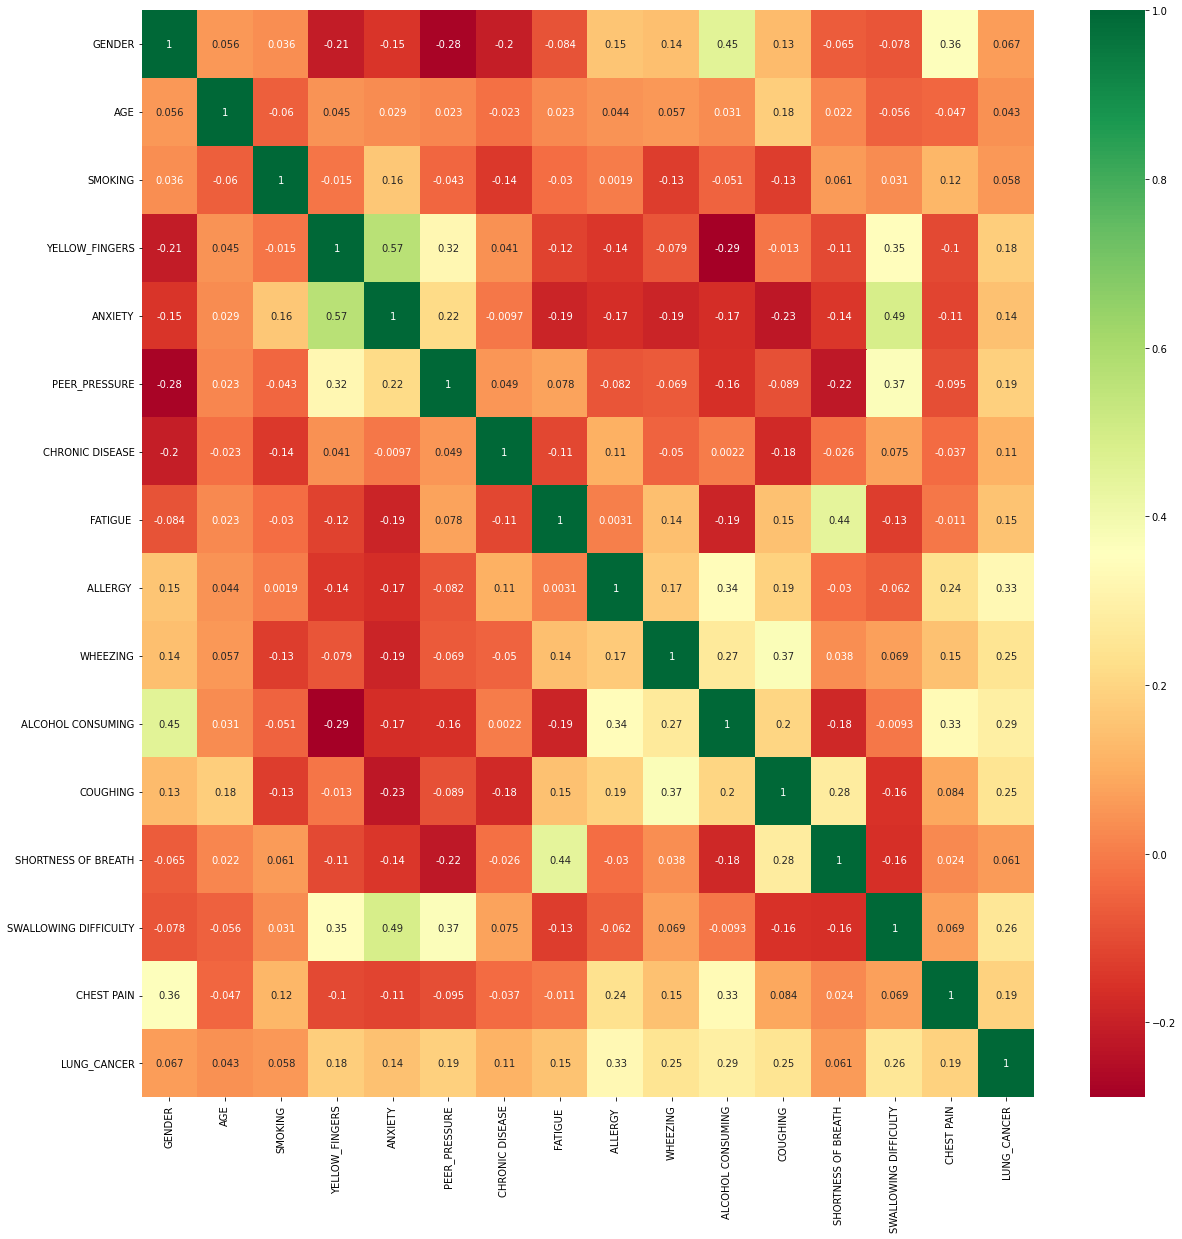

In [ ]:
X = data.iloc[:,0:16]  #independent columns
y = data.iloc[:,-1]    #target column 

#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

On the basis of corelation heat map we drop the following features:
*   Allergy
*   swallowing diificulty
*   coughing
*   alcohol consuming
*   wheezing
*   chest pain
*   yellow_finger
*   peer_pressure

This will assist in lowering the computation for now













In [ ]:
#drop the undesired features
to_drop=['YELLOW_FINGERS','PEER_PRESSURE','FATIGUE ', 'SWALLOWING DIFFICULTY' ,'CHEST PAIN', 'ALLERGY ','WHEEZING' ,'ALCOHOL CONSUMING' ]
data.drop(to_drop, axis=1, inplace=True)
data.head()

,GENDER,AGE,SMOKING,ANXIETY,CHRONIC DISEASE,COUGHING,SHORTNESS OF BREATH,LUNG_CANCER
0,1,1,0,1,0,1,1,1
1,1,1,1,0,1,0,1,1
2,0,0,0,0,0,1,1,0
3,1,1,1,1,0,0,0,0
4,0,1,0,0,0,1,1,0


In [ ]:
X = data.iloc[:,0:7]  #independent columns
y = data.iloc[:,-1]    #target column 

**Classifier**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from sklearn.feature_selection import SelectFromModel

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(216, 7)

In [ ]:
y_train.shape

(216,)

In [ ]:
# convert to one-hot vector
y_train1 = np_utils.to_categorical(y_train)
y_test1 = np_utils.to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=7, activation='sigmoid'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train1, epochs=5, batch_size=32)

Epoch 1/5
7/7 [==============================] - 1s 3ms/step - loss: 0.5163 - accuracy: 0.8519
Epoch 2/5
7/7 [==============================] - 0s 3ms/step - loss: 0.4350 - accuracy: 0.8519
Epoch 3/5
7/7 [==============================] - 0s 3ms/step - loss: 0.4183 - accuracy: 0.8519
Epoch 4/5
7/7 [==============================] - 0s 4ms/step - loss: 0.4187 - accuracy: 0.8519
Epoch 5/5
7/7 [==============================] - 0s 3ms/step - loss: 0.4184 - accuracy: 0.8519


In [ ]:
#evaluating model
loss, acc = model.evaluate(X_test,y_test1)
print(f'Testing Accuracy: {acc*100}')
print(f'Testing Loss: {loss}')

3/3 [==============================] - 0s 5ms/step - loss: 0.2794 - accuracy: 0.9247
Testing Accuracy: 92.4731194972992
Testing Loss: 0.2794376015663147


**Algorithm proposed by Fan et al**

First most imperative task is to formulate the knowledge base
**Knowledge base methods:**
1.   Direct method
2.   Query base
3.   Relevant query based

**Direct Method using Algo 3**

In [ ]:
def powerset(string):



In [ ]:
def directKB(data):
  counts = dict()
  Kd = dict()
  features = ['GENDER','AGE', 'SMOKING','ANXIETY', 'CHRONIC DISEASE' , 'COUGHING', 'SHORTNESS OF BREATH']
  for entry in range (0,len(data)):
    feaVals = []
    for fea in range(0,len(features)):
      # feaVals ← {a v| feature a has value v in entry}
      v = data.iloc[fea][entry]
      a = features[fea]
      feaVals.append(a,v)
      # label ←binary label of entry as integer
      label = data.iloc['LUNG_CANCER'][entry]
      # power set
      S = powerset(feaVals)
      for key in S:
        if key in counts:
          # counts[key] ← counts[key] + [1, label]
          counts[key] = [counts[key] + [1, label]]
        else:
          # counts[key] ← [1, label]
          counts[key] = [1, label]
    for key in counts:
    #  r ← counts[key][1]/counts[key][0]
      r = counts[key][1]/counts[key][0]
    # insert “[r] POS ∨ ¬key” to KD
      Kd[key] = r 
  return Kd


**Query base Method using Algo 5**

In [ ]:
def QueryRelevant(Q,Kd):
    features = ['GENDER','AGE', 'SMOKING','ANXIETY', 'CHRONIC DISEASE' , 'COUGHING', 'SHORTNESS OF BREATH']
    feaVals = []
    # feaVals ← {a v| feature a has value v in Q}
    for fea in range(0,len(features)):
      a = features[fea]
      v = Q[fea]
      feaVals.append(a,v)  
    S = powerset(feaVals)
    relevantKB = dict()
    # for each key an element of S do
    for key in S:
      # for each clause in KD do
        for clause in Kd:
          #if clause contains key then
            if key == clause:
                relevantKB[key] = Kd[clause]
    return relevantKB